### Metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
plt.style.use('seaborn-white')

Let's download a database

In [2]:
col_names = ['num_preg', 'glucose', 'bp', 'thickness', 'insulin', 'bmi', 'pedigree', 'age','label']
pima = pd.read_csv('./pima-data.csv')

In [3]:
pima.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [4]:
pima.tail()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [5]:
# define X and y
feature_cols = ['num_preg', 'insulin', 'bmi', 'age']

# X is a matrix, hence we use [] to access the features we want in feature_cols
X = pima[feature_cols]
print(X)

# y is a vector, hence we use dot to access 'label'
y = pima.diabetes
print(y)

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate model
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

     num_preg  insulin   bmi  age
0           6        0  33.6   50
1           1        0  26.6   31
2           8        0  23.3   32
3           1       94  28.1   21
4           0      168  43.1   33
..        ...      ...   ...  ...
763        10      180  32.9   63
764         2        0  36.8   27
765         5      112  26.2   30
766         1        0  30.1   47
767         1        0  30.4   23

[768 rows x 4 columns]
0       True
1      False
2       True
3      False
4       True
       ...  
763    False
764    False
765    False
766     True
767    False
Name: diabetes, Length: 768, dtype: bool


LogisticRegression()

In [6]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred_class))

0.6770833333333334


In [7]:
y_test

661     True
122    False
113    False
14      True
529    False
       ...  
366     True
301     True
382    False
140    False
463    False
Name: diabetes, Length: 192, dtype: bool

In [8]:
y_pred_class

array([False, False, False, False, False, False, False,  True, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False,  True,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True,  True,  True, False,  True, False, False,
       False, False,

In [9]:
print(pd.Series(logreg.classes_))

0    False
1     True
dtype: bool


In [10]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_class).T)
cm.index.name = 'Predicted'
cm.columns.name = 'Actual'
cm

Actual,0,1
Predicted,,
0,114,46
1,16,16


### Question

1. What is the accuracy if the model always just classify as False all the time?
1. What is the number of true positive, true negative, false positive and false negative for the above confusion matrix

In [11]:
# by taking "False" as postive instances
TP = 114
FP = 46
TN = 16
FN = 16

print('Classification error:', (FP + FN) / float(TP + TN + FP + FN))
print('Accuracy:', (TP + TN) / float(TP + TN + FP + FN))
print('Sensitivity:', TP / float(FN + TP))
print('Specificity:', TN / (TN + FP))
print('False Positive Rate:', FP / float(TN + FP))
print('Precision:', TP / float(TP + FP))

Classification error: 0.3229166666666667
Accuracy: 0.6770833333333334
Sensitivity: 0.8769230769230769
Specificity: 0.25806451612903225
False Positive Rate: 0.7419354838709677
Precision: 0.7125


In [12]:
# if the model always just classify as False all the time
TP = 114+16
FP = 46+16
TN = 0
FN = 0

print('Classification error:', (FP + FN) / float(TP + TN + FP + FN))
print('Accuracy:', (TP + TN) / float(TP + TN + FP + FN))
print('Sensitivity:', TP / float(FN + TP))
print('Specificity:', TN / (TN + FP))
print('False Positive Rate:', FP / float(TN + FP))
print('Precision:', TP / float(TP + FP))

Classification error: 0.3229166666666667
Accuracy: 0.6770833333333334
Sensitivity: 1.0
Specificity: 0.0
False Positive Rate: 1.0
Precision: 0.6770833333333334


In [13]:
# calculate using sklearn precision_recall_fcscore_support function
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred_class)
print('precision: ',precision)
print('recall: ', recall)
print('fscore: ',fscore)
print('support: ',support)

precision:  [0.7125 0.5   ]
recall:  [0.87692308 0.25806452]
fscore:  [0.7862069  0.34042553]
support:  [130  62]


### Question
1. Fill in the table

|Label|Precision|Recall|F-score|Support|
|-|-|-|-|-|
|0|0.713|0.877|0.786|130|
|1|0.500|0.258|0.340|62|

### Notes:

Sensitivity: When the actual value is positive, how often is the prediction correct?

    Something we want to maximize
    How "sensitive" is the classifier to detecting positive instances?
    Also known as "True Positive Rate" or "Recall"
    TP / all positive
        all positive = TP + FN



Specificity: When the actual value is negative, how often is the prediction correct?

    Something we want to maximize
    How "specific" (or "selective") is the classifier in predicting positive instances?
    TN / all negative
        all negative = TN + FP


Precision: When a positive value is predicted, how often is the prediction correct?

    How "precise" is the classifier when predicting positive instances?



Conclusion:

    Confusion matrix gives you a more complete picture of how your classifier is performing
    Also allows you to compute various classification metrics, and these metrics can guide your model selection

Which metrics should you focus on?

    Choice of metric depends on your business objective
        Identify if FP or FN is more important to reduce
        Choose metric with relevant variable (FP or FN in the equation)


In [14]:
# Calculate accuracy, classification error, sensitivity and precision
## using functions under the sklearn.metrics module

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class)) # Accuracy
print(1 - metrics.accuracy_score(y_test, y_pred_class))#Classification error
print(metrics.recall_score(y_test, y_pred_class))# sensitivity
print(metrics.precision_score(y_test, y_pred_class))#precision

0.6770833333333334
0.32291666666666663
0.25806451612903225
0.5


### <p style="color:red;">Task 9: Question 1 (1 mark)

#### (a) Fill in the correct value for TP, TN, FP and FN below.

In [15]:
TP = 114
FP = 46
TN = 16
FN = 16

#### (b) Compute classification error, accuracy, sensitivity, specificity, FPR and precision using the equations below. 
- classification_error = (FP + FN) / float(TP + TN + FP + FN)
- accuracy=(TP + TN) / float(TP + TN + FP + FN)
- sensitivity = TP / float(FN + TP)
- specificity = TN / (TN + FP)
- false_positive_rate = FP / float(TN + FP)
- precision = TP / float(TP + FP)

In [16]:
print('Classification error:', (FP + FN) / float(TP + TN + FP + FN))
print('Accuracy:', (TP + TN) / float(TP + TN + FP + FN))
print('Sensitivity:', TP / float(FN + TP))
print('Specificity:', TN / (TN + FP))
print('False Positive Rate:', FP / float(TN + FP))
print('Precision:', TP / float(TP + FP))

Classification error: 0.3229166666666667
Accuracy: 0.6770833333333334
Sensitivity: 0.8769230769230769
Specificity: 0.25806451612903225
False Positive Rate: 0.7419354838709677
Precision: 0.7125


### Adjusting the classification threshold

In [17]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (true,false)
logreg.predict(X_test)[0:10]

array([False, False, False, False, False, False, False,  True, False,
        True])

In [18]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10]

array([[0.61405867, 0.38594133],
       [0.7505398 , 0.2494602 ],
       [0.74167648, 0.25832352],
       [0.60291327, 0.39708673],
       [0.88426611, 0.11573389],
       [0.87695895, 0.12304105],
       [0.50819992, 0.49180008],
       [0.44582289, 0.55417711],
       [0.77950769, 0.22049231],
       [0.25853303, 0.74146697]])

Output of logreg.predict_proba(X_test)[0:10] is

Each Row: observation

    Each row, numbers sum to 1

Column: class

    2 response classes there 2 columns
        column 0: predicted probability that each observation is a member of class 0
        column 1: predicted probability that each observation is a member of class 1

predict_proba process

    Predicts the probabilities
    Choose the class with the highest probability

There is a 0.5 classification threshold

    Class 1 is predicted if probability > 0.5
    Class 0 is predicted if probability < 0.5




### We can change the threshold 

In [19]:
#predict diabetes if the predicted probability is greater than 0.3

#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html
from sklearn.preprocessing import Binarizer,binarize

# print the first 10 predicted probabilities for class 1
print(logreg.predict_proba(X_test)[0:10, 1])

# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)
y_pred_class = binarize(y_pred_prob, threshold=0.3)[:,1] # we only use the second column
print(y_pred_class[0:10])

#check that the those values above the threshold are now listed as 1 in y_pred_class

[0.38594133 0.2494602  0.25832352 0.39708673 0.11573389 0.12304105
 0.49180008 0.55417711 0.22049231 0.74146697]
[1. 0. 0. 1. 0. 0. 1. 1. 0. 1.]


In [20]:
# new confusion matrix (threshold of 0.3)

cm1 = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_class).T)
cm1.index.name = 'Predicted'
cm1.columns.name = 'Actual'
cm1

Actual,0,1
Predicted,,
0,82,17
1,48,45


The row totals are the same
The rows represent actual response values

    130 values top row
    62 values bottom row

Observations from the left column moving to the right column because we will have more TP and FP 

### <p style="color:red;">Task 9: Question 2 (1 mark)
Calculate the sensitivity and specificity

In [21]:
# Use the confusion matrix above, calculate sensitivity and specificity
## using functions under the sklearn.metrics module
from sklearn.metrics import confusion_matrix
TN, FP, FN, TP = confusion_matrix(y_test, y_pred_class).ravel()


Sensitivity = metrics.recall_score(y_test, y_pred_class) 
Specificity = TN/(TN+FP)

print("Sensitivity:", round(Sensitivity, 3))
print("Specificity:", round(Specificity, 3))

Sensitivity: 0.726
Specificity: 0.631




Conclusion:

   - Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions
   - Threshold can be adjusted to increase sensitivity or specificity
   - Sensitivity and specificity have an inverse relationship
        * Increasing one would always decrease the other
   - Adjusting the threshold should be one of the last step you do in the model-building process
        * The most important steps are
           1. Building the models
           1.  Selecting the best model



### ROC Curve
<b>Question:</b> 
    
    Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?

<b>Answer:</b> 
    
    Plot the Receiver Operating Characteristic (ROC) curve


0.7227047146401985


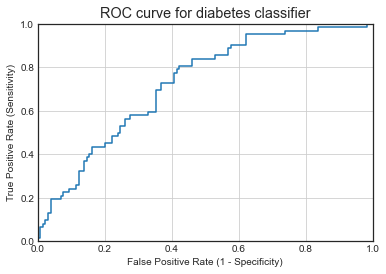

In [22]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
y_pred_proba = logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

auc = metrics.roc_auc_score(y_test, y_pred_proba[:,1])
print(auc)

In [23]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [24]:
evaluate_threshold(0.5)

Sensitivity: 0.25806451612903225
Specificity: 0.8769230769230769


In [25]:
evaluate_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6307692307692307


### <p style="color:red;">Task 9: Question 3 (2%)
(a) Add more features into X. Print the accuracy and confusion matrix. Did you get better accuracy?

In [35]:
# feature_cols = ['num_preg','insulin', 'bmi', 'age']
# Add more features to feature_cols above
# define X
# define y
# split X and y into training and testing sets
# instantiate model
# fit model
# make class predictions for the testing set
# print accuracy
# print confusion matrix

feature_cols = ["num_preg", "insulin", "bmi", "age", "thickness", "skin"]

In [36]:
# X is a matrix, hence we use [] to access the features we want in feature_cols
X = pima[feature_cols]
print(X)

# y is a vector, hence we use dot to access 'label'
y = pima.diabetes
print(y)

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate model
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

     num_preg  insulin   bmi  age  thickness    skin
0           6        0  33.6   50         35  1.3790
1           1        0  26.6   31         29  1.1426
2           8        0  23.3   32          0  0.0000
3           1       94  28.1   21         23  0.9062
4           0      168  43.1   33         35  1.3790
..        ...      ...   ...  ...        ...     ...
763        10      180  32.9   63         48  1.8912
764         2        0  36.8   27         27  1.0638
765         5      112  26.2   30         23  0.9062
766         1        0  30.1   47          0  0.0000
767         1        0  30.4   23         31  1.2214

[768 rows x 6 columns]
0       True
1      False
2       True
3      False
4       True
       ...  
763    False
764    False
765    False
766     True
767    False
Name: diabetes, Length: 768, dtype: bool


LogisticRegression()

In [37]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred_class))

0.6875


In [38]:
y_test

661     True
122    False
113    False
14      True
529    False
       ...  
366     True
301     True
382    False
140    False
463    False
Name: diabetes, Length: 192, dtype: bool

In [39]:
y_pred_class

array([False, False, False, False, False, False, False,  True, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True, False, False, False,  True,
       False, False, False, False,  True, False,  True,  True, False,
       False, False, False, False, False, False,  True,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False,  True, False,  True, False,  True, False, False,
       False, False,

In [40]:
print(pd.Series(logreg.classes_))

0    False
1     True
dtype: bool


In [41]:
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_class).T)
cm.index.name = 'Predicted'
cm.columns.name = 'Actual'
cm

Actual,0,1
Predicted,,
0,114,44
1,16,18


By adding thickness and skin into X, the accuracy gotten from the model is 0.6875 which is higher.

(b) Plot the ROC curve. Comment on the results.

0.7297766749379653


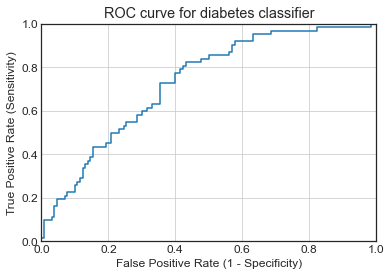

In [42]:
# plot roc curve here
y_pred_proba = logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

auc = metrics.roc_auc_score(y_test, y_pred_proba[:,1])
print(auc)

The auc score is 0.7298 which is higher in compared to the auc score of 0.7227 gotten from the previous ROC.